In [1]:
# import Agros Suite
from agrossuite import agros
import agrossuite.vtk_tools as vtk_tools

In [2]:
# define model with given parameters
def model(L, R1, R2, R3, R4, RB, U, eps1, eps2):    
    # problem
    problem = agros.problem(clear = True)
    problem.coordinate_type = "axisymmetric"
    problem.mesh_type = "triangle"

    # fields
    # electrostatic
    electrostatic = problem.field("electrostatic")
    electrostatic.analysis_type = "steadystate"
    electrostatic.number_of_refinements = 0
    electrostatic.polynomial_order = 4
    electrostatic.adaptivity_type = "disabled"
    electrostatic.solver = "linear"

    # boundaries
    electrostatic.add_boundary("Source", "electrostatic_potential", {"electrostatic_potential" : U})
    electrostatic.add_boundary("Ground", "electrostatic_potential", {"electrostatic_potential" : 0})
    electrostatic.add_boundary("Neumann", "electrostatic_surface_charge_density", {"electrostatic_surface_charge_density" : 0})

    # materials
    electrostatic.add_material("Air", {"electrostatic_charge_density" : 0, "electrostatic_permittivity" : 1})
    electrostatic.add_material("Dielectric 1", {"electrostatic_charge_density" : 0, "electrostatic_permittivity" : eps1})
    electrostatic.add_material("Dielectric 2", {"electrostatic_charge_density" : 0, "electrostatic_permittivity" : eps2})

    # geometry
    geometry = problem.geometry()
    geometry.add_edge(0, RB, 0, L, boundaries = {"electrostatic" : "Neumann"})
    geometry.add_edge(R1, L, R1, 0, boundaries = {"electrostatic" : "Source"})
    geometry.add_edge(R1, 0, R2, 0, boundaries = {"electrostatic" : "Neumann"})
    geometry.add_edge(R2, 0, R2, L)
    geometry.add_edge(R2, L, R3, L)
    geometry.add_edge(R3, 0, R2, 0, boundaries = {"electrostatic" : "Neumann"})
    geometry.add_edge(R3, L, R3, 0, boundaries = {"electrostatic" : "Ground"})
    geometry.add_edge(R4, 0, R4, L, boundaries = {"electrostatic" : "Ground"})
    geometry.add_edge(R3, L, R4, L, boundaries = {"electrostatic" : "Ground"})
    geometry.add_edge(R4, 0, RB, 0, boundaries = {"electrostatic" : "Neumann"})
    geometry.add_edge(RB, 0, 0, RB, angle = 90, segments = 8, boundaries = {"electrostatic" : "Neumann"})
    geometry.add_edge(R1, L, R2, L)
    geometry.add_edge(R1, L, 0, L, boundaries = {"electrostatic" : "Source"})

    geometry.add_label((R1+R2)/2.0, L/2.0, materials = {"electrostatic" : "Dielectric 1"})
    geometry.add_label((R2+R3)/2.0, L/2.0, materials = {"electrostatic" : "Dielectric 2"})
    geometry.add_label(R1, RB-R1, materials = {"electrostatic" : "Air"})
    
    return problem

In [3]:
L = 0.1
R1 = 0.01
R2 = 0.03
R3 = 0.05
R4 = 0.06
RB = 0.25
U = 10
eps1 = 3
eps2 = 4

problem = model(L, R1, R2, R3, R4, RB, U, eps1, eps2)

In [4]:
computation = problem.computation()
computation.solve()

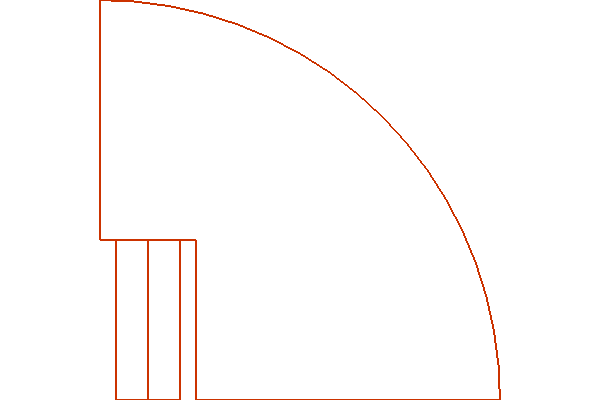

In [5]:
vtk_tools.show_geometry(problem)

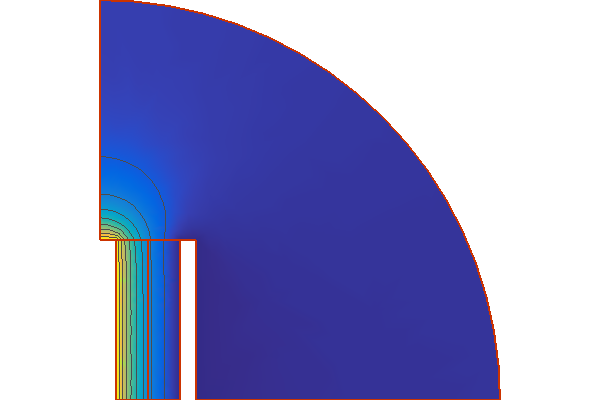

In [6]:
vtk_tools.show(problem, computation, "electrostatic", "electrostatic_potential", "scalar")